# 🏪 Proyecto Aurelion

Este notebook documenta el proceso de **análisis, limpieza y transformación de datos** de la tabla `VENTAS` del proyecto *Aurelion*, utilizando la biblioteca **Pandas** en Python.

El objetivo es preparar un conjunto de datos estructurado, limpio y estandarizado para posteriores procesos de análisis estadístico, modelado o visualización.

## 📊 Descripción General

La tabla `VENTAS` contiene información detallada sobre operaciones comerciales, incluyendo campos de identificación, fechas, montos y categorías de productos.

A lo largo de este notebook se realizarón las siguientes tareas principales:

- Importación de los datos desde un archivo **Excel (.xlsx)**.  
- Creación del dataframe inicial `df_ventas_c`.  
- Procesamiento, normalización y renombrado de columnas para generar el dataframe limpio `df_ventas`.  
- Aplicación de operaciones básicas de **limpieza**, **transformación** y **estandarización** de los datos.  
- Generación de **estadísticas descriptivas** para comprender la distribución y consistencia de las variables.

## ⚙️ Limpieza y Transformación de los Datos

En esta sección se detallan las operaciones realizadas para asegurar la integridad y coherencia del dataset:

1. **Revisión de valores nulos y duplicados.**  
   - Identificación y tratamiento de valores faltantes.  
   - Eliminación o imputación según el contexto de negocio.

2. **Estandarización de tipos de datos.**  
   - Conversión de fechas, montos y categorías al formato correcto.  
   - Normalización de cadenas y eliminación de espacios o caracteres no deseados.

3. **Renombrado de columnas.**  
   - Aplicación de nombres consistentes y descriptivos conforme a las buenas prácticas de análisis de datos.

4. **Validación del dataframe final.**  
   - Verificación de dimensiones, tipos y contenido.  
   - Comparación con el dataframe original (`df_ventas_c`).

## 📝 Validación y Preparación Final del Dataset

Tras completar el proceso de limpieza y transformación, se realizarón una verificación integral del dataframe resultante df_ventas con el fin de asegurar su consistencia y calidad para análisis posteriores.

En esta etapa se incluyen las siguientes tareas:

- Comparación estructural entre el dataframe original (df_ventas_c) y el limpio (df_ventas).

- Verificación de dimensiones, tipos de datos y valores válidos.

- Confirmación de la eliminación de duplicados y valores nulos.

- Validación de nombres de columnas y formato general conforme a las convenciones de análisis.

- Consolidación del dataset final, listo para ser exportado o utilizado en etapas de modelado o visualización.

#### 🔧 Importamos librerias instaladas para implementarlas en el código

In [2]:
# Importa librerías de análisis: pandas/numpy para ETL, matplotlib/seaborn para gráficos y Path para rutas portables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


## 📥 Carga del Archivo de Datos

En esta sección se realiza la **importación del dataset principal** utilizando una **ruta relativa** y la librería `pathlib.Path`. Esto no solo simplifica la ruta, sino que también garantiza que el código sea **portable** y funcione correctamente en diferentes sistemas operativos (Windows, macOS, Linux), siempre y cuando la estructura de directorios se mantenga consistente.

> 📂 **Ruta del archivo:**   
> El archivo se accede mediante la construcción **`Path('db') / 'ventas.xlsx'`**.

La lectura del archivo se efectúa mediante la función `pd.read_excel()` de la biblioteca **pandas**, creando el dataframe inicial `df_ventas_c`, el cual servirá como base para los procesos posteriores de limpieza y análisis.

In [3]:
# Lee el libro de ventas con Path para mantener rutas relativas entre entornos
path_dataset = Path('db') / 'ventas.xlsx'
df_ventas_c = pd.read_excel(path_dataset)

# Genera una vista inicial para auditar columnas y tipos cargados
df_ventas_c.head()


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta


## 🔍 Inspección Inicial del Dataset

En esta etapa se realiza una **inspección exploratoria básica** del DataFrame `df_ventas_c` recién cargado, con el objetivo de verificar que los datos se hayan importado correctamente y posean la estructura esperada.

Para ello, se utilizan las funciones:

In [4]:
# Revisa las primeras 8 filas para detectar inconsistencias tempranas
df_ventas_c.head(8)


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta
5,6,2024-05-05,91,Uma Sanchez,uma.sanchez@mail.com,transferencia
6,7,2024-05-06,92,Mariana Rodriguez,mariana.rodriguez@mail.com,efectivo
7,8,2024-01-06,66,Tomas Herrera,tomas.herrera@mail.com,transferencia


In [5]:
# Contrasta las últimas 4 filas para identificar valores atípicos al final del dataset
df_ventas_c.tail(4)


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
116,117,2024-03-14,72,Camila Rodriguez,camila.rodriguez@mail.com,tarjeta
117,118,2024-02-09,84,Pablo Sanchez,pablo.sanchez@mail.com,efectivo
118,119,2024-02-07,51,Agustina Gomez,agustina.gomez@mail.com,qr
119,120,2024-04-21,72,Camila Rodriguez,camila.rodriguez@mail.com,tarjeta


## 🧠 Exploración de Tipos de Datos y Valores Nulos

En esta etapa se realiza una **revisión estructural del DataFrame** para confirmar que los tipos de datos asignados a cada variable durante la lectura con `pd.read_excel()` sean correctos y coherentes con la naturaleza de la información (por ejemplo, fechas, números, textos, etc.).

Además, se evalúa la **presencia de valores nulos o faltantes**, los cuales podrían requerir tratamiento posterior durante el proceso de limpieza y estandarización.

### 🧩 Procedimiento

In [6]:
# Inspecciona estructura, tipos dtypes y memoria del dataframe importado
df_ventas_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        120 non-null    int64         
 1   fecha           120 non-null    datetime64[ns]
 2   id_cliente      120 non-null    int64         
 3   nombre_cliente  120 non-null    object        
 4   email           120 non-null    object        
 5   medio_pago      120 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.8+ KB


> 💡 **Conclusión:**  
> A partir de la ejecución del comando `df_ventas_c.info()`, se observa que la base de datos cuenta con **120 registros** distribuidos en **6 columnas**.  
> Cada columna presenta **120 valores no nulos**, lo que indica que **no existen datos faltantes (NaN)** en el dataset.  
> Además, los tipos de datos se encuentran correctamente definidos: campos numéricos (`int64`), de texto (`object`) y de fecha (`datetime64[ns]`), lo que refleja una estructura **coherente y lista para iniciar el proceso de limpieza y transformación**.

### 🕵️‍♂️ Detección de Valores Nulos

Se analiza la presencia de valores faltantes para priorizar acciones de limpieza y asegurar la consistencia del dataset.

In [7]:
# Visualiza la máscara booleana donde True marca valores faltantes por celda
df_ventas_c.isnull()

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
115,False,False,False,False,False,False
116,False,False,False,False,False,False
117,False,False,False,False,False,False
118,False,False,False,False,False,False


In [8]:
# Resume la cantidad de nulos por columna para priorizar limpieza
df_ventas_c.isnull().sum()


id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64

In [9]:
df_ventas_c.describe(include='all')  # Estadísticas descriptivas para todas las columnas

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
count,120.000000,120,120.000000,120,120,120
unique,NaN,NaN,NaN,64,67,4
top,NaN,NaN,NaN,Bruno Diaz,bruno.diaz@mail.com,efectivo
freq,NaN,NaN,NaN,5,5,37
mean,60.500000,2024-03-29 17:36:00,47.291667,NaN,NaN,NaN
min,1.000000,2024-01-02 00:00:00,1.000000,NaN,NaN,NaN
25%,30.750000,2024-02-11 06:00:00,24.500000,NaN,NaN,NaN
50%,60.500000,2024-03-25 00:00:00,48.500000,NaN,NaN,NaN
75%,90.250000,2024-05-19 06:00:00,67.500000,NaN,NaN,NaN
max,120.000000,2024-06-28 00:00:00,100.000000,NaN,NaN,NaN


> 💬 Conclusión: El número de **`valores únicos (o clases)`** en la variable categórica **`medio_pago`** es **`Unique = 4`**. Dado que se identificaron cuatro clases distintas dentro de la categoría `medio_pago`, esta característica es apta para ser `codificada` mediante la **técnica de `One-Hot-Encoding`**. Este método de codificación resultará en la creación de **cuatro nuevas variables binarias (0 o 1)** para su uso en el modelado.

## ⚙️ Normalización y Corrección de Tipos de Datos

Antes de realizar la normalización de la base de datos, es necesario **verificar y corregir los tipos de datos** asignados a las variables y estandarizar los campos de texto. En este caso, la columna `fecha` se convierte al formato `datetime` para permitir análisis temporal. Adicionalmente, se **normalizan** los campos de texto (`nombre_cliente` y `email`) y se optimiza `medio_pago` a tipo `categórico` para mejorar la eficiencia del DataFrame.

### 🧩 Fundamento

Corregir los tipos de datos garantiza la **precisión numérica** en cálculos y estadísticas.  
Si se mantuvieran como enteros, se perdería información decimal y se podrían producir errores al calcular promedios, totales o al aplicar operaciones aritméticas.

Este paso forma parte del proceso de **limpieza estructural** dentro de la metodología ETL (Extract, Transform, Load):

1. **Extracción:** se importan los datos desde el archivo Excel.  
2. **Transformación estructural:** se ajustan los tipos de datos para asegurar coherencia.  
3. **Normalización:** se reorganiza la base, eliminando redundancias o columnas innecesarias.

### 🧮 Procedimiento

- Se aplican las transformaciones para:

     **Fecha:** Asegurar formato `datetime` (día-mes-año), tratando los errores como `NaT`.

     **Texto:** Limpiar `nombre_cliente` (eliminar espacios, formato título) y `email` (eliminar espacios, minúsculas).

     **Categórica:** Convertir `medio_pago` a tipo `category`.

In [10]:
# Convierte fecha al formato datetime (día-mes-año) y marca entradas inválidas como NaT
df_ventas_c['fecha'] = pd.to_datetime(df_ventas_c['fecha'], dayfirst=True, errors='coerce')

# Normaliza campos de texto: elimina espacios, ajusta capitalización y homogeniza correos
df_ventas_c['nombre_cliente'] = df_ventas_c['nombre_cliente'].str.strip().str.title()
df_ventas_c['email'] = df_ventas_c['email'].str.lower().str.strip()

# Define medio_pago como categoría para optimizar memoria y habilitar análisis estadístico
df_ventas_c['medio_pago'] = df_ventas_c['medio_pago'].astype('category')


#### 🕵️‍♂️ Verificación de Transformaciones

Se valida que los cambios aplicados hayan surtido efecto tanto en los tipos de datos como en los valores muestreados.

In [11]:
# Verifica los tipos de datos de las columnas normalizadas tras la conversión
df_ventas_c[["fecha", "nombre_cliente", "email", "medio_pago"]].dtypes

fecha             datetime64[ns]
nombre_cliente            object
email                     object
medio_pago              category
dtype: object

In [12]:
# Realiza muestreo de las columnas transformadas para comprobar resultados
df_ventas_c[["fecha", "nombre_cliente", "email", "medio_pago"]].head()

,fecha,nombre_cliente,email,medio_pago
0,2024-06-19,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2024-03-17,Olivia Gomez,olivia.gomez@mail.com,qr
2,2024-01-13,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,2024-02-27,Martina Molina,martina.molina@mail.com,transferencia
4,2024-06-11,Bruno Diaz,bruno.diaz@mail.com,tarjeta


#### 🕵️‍♂️ Control de Calidad: Duplicados

Se evalúa la unicidad de registros, especialmente en la columna `id_venta`, que actúa como identificador clave.

In [13]:
# Evalúa duplicados globales y por id_venta para validar la unicidad clave de ventas
cantidad_duplicados = df_ventas_c.duplicated().sum()
duplicados_id_venta = df_ventas_c['id_venta'].duplicated().sum()

print()
print('--- Registros Duplicados ---')
if cantidad_duplicados > 0:
    print(f'Se encontraron {cantidad_duplicados} filas duplicadas.')
else:
    print('No se encontraron filas duplicadas.')

if duplicados_id_venta > 0:
    print(f'Alerta: se detectaron {duplicados_id_venta} valores repetidos en id_venta (posible clave primaria).')
else:
    print('id_venta es único en df_ventas_c.')

# Referencia de acción: usar df_ventas_c.drop_duplicates() si se requiere depurar duplicados
# df_ventas_c = df_ventas_c.drop_duplicates().copy()



--- Registros Duplicados ---
No se encontraron filas duplicadas.
id_venta es único en df_ventas_c.


> 💡 **Conclusión:**                                                                 
> Luego de la verificación y **normalización optimizada** de tipos de datos, se confirma que todas las variables del *dataset* `VENTAS` presentan formatos consistentes y adecuados:
> * La columna **`fecha`** se encuentra correctamente definida como **`datetime64[ns]`**, interpretada bajo el formato **día-mes-año (dd-mm-yyyy)** conforme al estándar de la República Argentina.
> * Las columnas **`nombre_cliente`** y **`email`** se mantienen como texto (`object` o `string`), asegurando su **normalización** (mayúsculas, minúsculas y eliminación de espacios) con un código más limpio y eficiente al **eliminar pasos de conversión redundantes**.
> * La variable **`medio_pago`** fue convertida al tipo **categórico (`category`)**, lo que facilita su uso en análisis descriptivos y segmentaciones, optimizando el uso de memoria.
> De esta forma, el *dataframe* `df_ventas_c` queda estructurado de manera coherente, **garantizando integridad, consistencia, y una ligera mejora en la eficiencia del procesamiento** para las etapas posteriores de transformación y análisis.

#### 🧩 Normalización de la Base de Datos

En esta etapa se aplica la **forma de normalización** sobre el DataFrame `df_ventas_c`, eliminando las columnas **`nombre_cliente`** y **`email`**. 
Estas **columnas presentan información descriptiva redundante** respecto a **`id_cliente`** (la clave foránea del cliente en esta tabla transaccional), por lo que se suprimen para evitar duplicidad de datos y mantener la integridad estructural de la base de datos (Primera Forma Normal).

In [14]:
# Crea df_ventas_True excluyendo columnas personales redundantes frente a id_cliente
df_ventas_True = df_ventas_c.drop(columns=['nombre_cliente', 'email'])


In [15]:
# Inspecciona las primeras filas del dataset anonimizado para asegurar integridad
df_ventas_True.head()


,id_venta,fecha,id_cliente,medio_pago
0,1,2024-06-19,62,tarjeta
1,2,2024-03-17,49,qr
2,3,2024-01-13,20,tarjeta
3,4,2024-02-27,36,transferencia
4,5,2024-06-11,56,tarjeta


#### Revisión de Integridad de **df_ventas_True**

In [16]:
## Auditoría de integridad: nulos y duplicados en df_ventas_True

# Paso 1: contabiliza nulos por columna para definir tratamientos
print('--- Valores Nulos en df_ventas_True ---')
print(df_ventas_True.isnull().sum())
print('-' * 37)

# Paso 2: identifica y elimina duplicados manteniendo consistencia de id_venta
cantidad_duplicados = df_ventas_True.duplicated().sum()
duplicados_id_venta = df_ventas_True['id_venta'].duplicated().sum()

print()
print('--- Registros Duplicados ---')
if cantidad_duplicados > 0:
    print(f'Se encontraron {cantidad_duplicados} filas duplicadas. Eliminando...')
    df_ventas_True = df_ventas_True.drop_duplicates().copy()
    print('Duplicados eliminados.')
else:
    print('No se encontraron filas duplicadas.')

if duplicados_id_venta > 0:
    print(f'Alerta: se identificaron {duplicados_id_venta} valores repetidos en id_venta dentro de df_ventas_True.')
else:
    print('id_venta es único en df_ventas_True.')


--- Valores Nulos en df_ventas_True ---
id_venta      0
fecha         0
id_cliente    0
medio_pago    0
dtype: int64
-------------------------------------

--- Registros Duplicados ---
No se encontraron filas duplicadas.
id_venta es único en df_ventas_True.


### **Anlálisis exploratorio preliminar**

#### 📊 Análisis de Frecuencias (Variable Categórica: **medio_pago**)

- Se utiliza un **Gráfico de Barras** para ver qué medio de pago es el más utilizado.

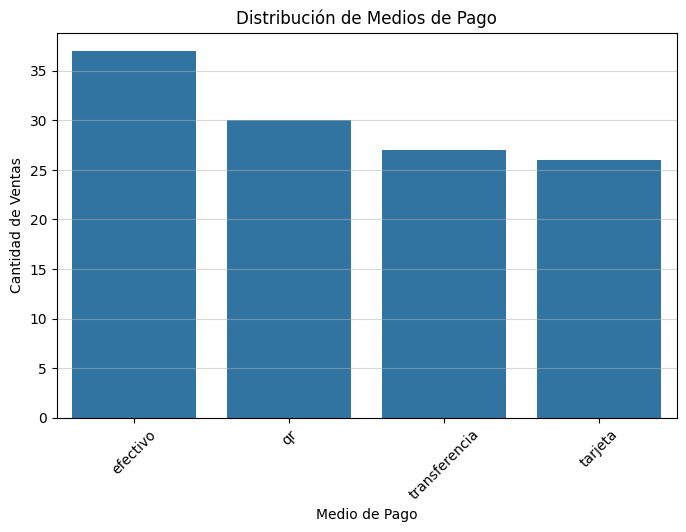

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns  # Opcional, pero recomendado para barras/conteo

plt.figure(figsize=(8, 5))
# Grafica el conteo de medio_pago ordenado por frecuencia para comparar aportes
sns.countplot(data=df_ventas_True, x='medio_pago', order=df_ventas_True['medio_pago'].value_counts().index)
plt.title('Distribución de Medios de Pago')
plt.xlabel('Medio de Pago')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


> 💡 **Conclusión:**  
> El medio de pago con mayor frecuencia de uso es **efectivo**, concentrando aproximadamente un 31 % **de las transacciones** (alrededor de 37 ventas).
Le siguen **QR** con un **25 %**, **transferencia** con un **22 %** y **tarjeta** con un **21 %**.
Esto sugiere que, aunque los medios digitales están presentes, el **efectivo continúa siendo el principal canal de pago** entre los clientes.

#### 📊 Análisis de Proporciones (Gráfico Circular)

- Muestra la proporción de cada categoría de pago.

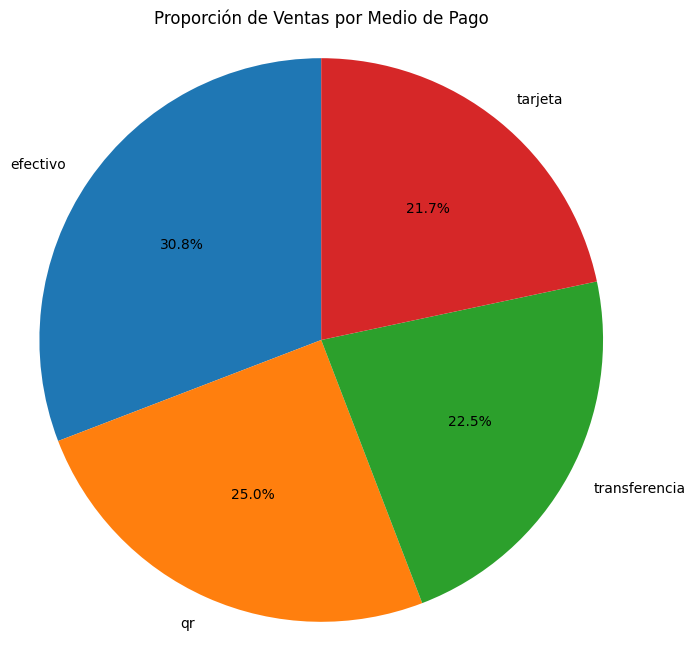

In [18]:
# Calcula frecuencia absoluta por medio_pago para alimentar el gráfico de pastel
proporciones = df_ventas_True['medio_pago'].value_counts()
plt.figure(figsize=(8, 8))

plt.pie(proporciones,
        labels=proporciones.index,
        autopct='%1.1f%%',  # Formato de etiqueta porcentual con un decimal
        startangle=90)
plt.title('Proporción de Ventas por Medio de Pago')
plt.axis('equal')  # Mantiene la relación de aspecto para un círculo perfecto
plt.show()


#### 📊 Análisis de Tendencia Temporal (Variable: **fecha**)

- Se utiliza un **Gráfico de Líneas** para ver cómo evolucionan las ventas a lo largo del tiempo. Para esto, primero debes **agrupar** las ventas por día, semana o mes.

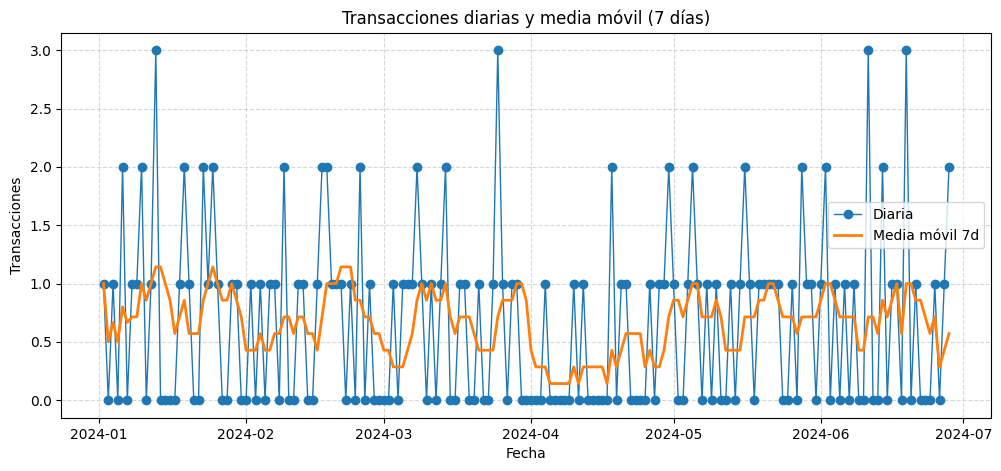

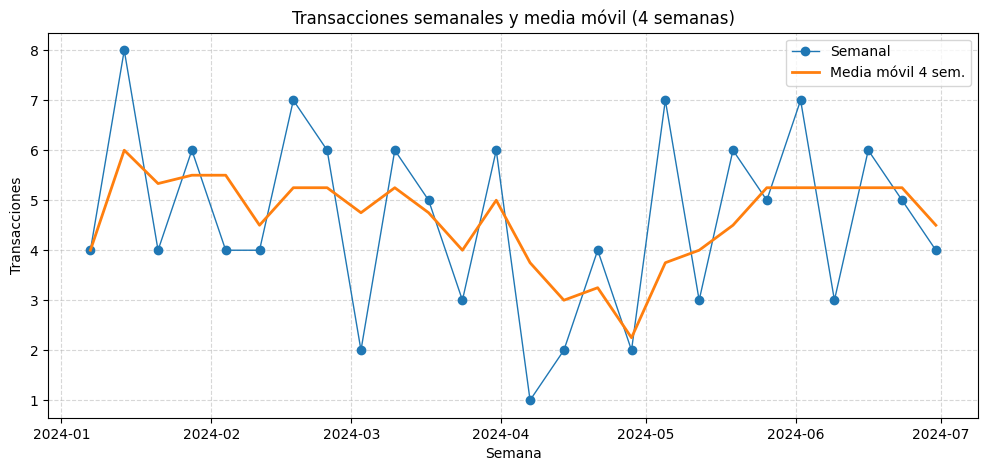

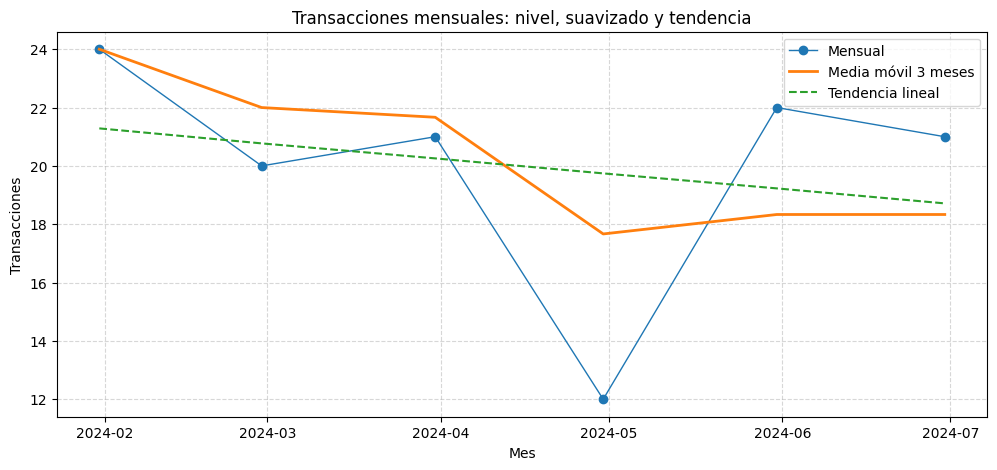

--- Resumen mensual ---
            transacciones  clientes_unicos  media_movil_3m  variacion_pct
fecha                                                                    
2024-01-31             24               23       24.000000            NaN
2024-02-29             20               17       22.000000      -0.166667
2024-03-31             21               19       21.666667       0.050000
2024-04-30             12               11       17.666667      -0.428571
2024-05-31             22               17       18.333333       0.833333
2024-06-30             21               18       18.333333      -0.045455

Coeficiente de variación (mensual): 0.19
Pendiente tendencia lineal (transacciones/mes): -0.51


In [19]:
# Prepara un índice temporal robusto: depura NaN, fuerza datetime y agrega flag de transacción
df_ts = (
    df_ventas_True
        .dropna(subset=['fecha'])
        .assign(
            fecha=lambda d: pd.to_datetime(d['fecha'], errors='coerce'),
            transacciones=1
        )
        .dropna(subset=['fecha'])
        .set_index('fecha')
        .sort_index()
)

# Paso 1: agrega transacciones diarias y suaviza con media móvil de 7 días
serie_d = df_ts['transacciones'].resample('D').sum()
serie_d_ma7 = serie_d.rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12, 5))
plt.plot(serie_d.index, serie_d.values, marker='o', linewidth=1, label='Diaria')
plt.plot(serie_d_ma7.index, serie_d_ma7.values, linewidth=2, label='Media móvil 7d')
plt.title('Transacciones diarias y media móvil (7 días)')
plt.xlabel('Fecha')
plt.ylabel('Transacciones')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Paso 2: consolida serie semanal y calcula suavizado de 4 semanas
serie_w = df_ts['transacciones'].resample('W').sum()
serie_w_ma4 = serie_w.rolling(window=4, min_periods=1).mean()

plt.figure(figsize=(12, 5))
plt.plot(serie_w.index, serie_w.values, marker='o', linewidth=1, label='Semanal')
plt.plot(serie_w_ma4.index, serie_w_ma4.values, linewidth=2, label='Media móvil 4 sem.')
plt.title('Transacciones semanales y media móvil (4 semanas)')
plt.xlabel('Semana')
plt.ylabel('Transacciones')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Paso 3: agrega serie mensual, calcula estadísticos derivados y tendencia lineal
serie_m = df_ts['transacciones'].resample('ME').sum()
serie_m_ma3 = serie_m.rolling(window=3, min_periods=1).mean()

resumen_mensual = (
    df_ts
        .groupby(pd.Grouper(freq='ME'))
        .agg(
            transacciones=('transacciones', 'sum'),
            clientes_unicos=('id_cliente', 'nunique')
        )
)

resumen_mensual['media_movil_3m'] = resumen_mensual['transacciones'].rolling(3, min_periods=1).mean()
resumen_mensual['variacion_pct'] = resumen_mensual['transacciones'].pct_change()

x = np.arange(len(resumen_mensual))
coef = np.polyfit(x, resumen_mensual['transacciones'], 1)
resumen_mensual['tendencia_lineal'] = np.polyval(coef, x)

cv_mensual = resumen_mensual['transacciones'].std(ddof=0) / resumen_mensual['transacciones'].mean()
pendiente_mensual = coef[0]

plt.figure(figsize=(12, 5))
plt.plot(serie_m.index, serie_m.values, marker='o', linewidth=1, label='Mensual')
plt.plot(serie_m_ma3.index, serie_m_ma3.values, linewidth=2, label='Media móvil 3 meses')
plt.plot(resumen_mensual.index, resumen_mensual['tendencia_lineal'], linestyle='--', label='Tendencia lineal')
plt.title('Transacciones mensuales: nivel, suavizado y tendencia')
plt.xlabel('Mes')
plt.ylabel('Transacciones')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

print('--- Resumen mensual ---')
print(resumen_mensual[['transacciones', 'clientes_unicos', 'media_movil_3m', 'variacion_pct']])

print()
print(f'Coeficiente de variación (mensual): {cv_mensual:.2f}')
print(f'Pendiente tendencia lineal (transacciones/mes): {pendiente_mensual:.2f}')


> 💡 **Conclusión:**  
> El suavizado temporal muestra un comportamiento estable con oscilaciones moderadas: el coeficiente de variación mensual se ubica en 0.19 (19 %), por lo que la dispersión alrededor del promedio es acotada.  
> - La pendiente de la tendencia lineal es de -0.51 transacciones por mes, valor cercano a cero que respalda un escenario prácticamente estacionario durante el primer semestre.  
> - Los repuntes de mayo (variación mensual +83 %) y la corrección ligera de junio (-5 %) concentran los principales movimientos, de modo que conviene monitorear si vuelven a repetirse en cortes futuros.  
> 🎯 **Implicación de Negocio:**
> 
> La estabilidad operativa (CV del 19 %) garantiza **predictibilidad** en la planificación de recursos y la gestión de *staffing*. Sin embargo, la **pendiente plana y ligeramente negativa** (-0.51 transacciones/mes) es un indicador de **riesgo de estancamiento**, confirmando que el negocio no está generando crecimiento orgánico sostenido.
> 
> El **pico anómalo de Mayo (+83 %)** es el punto más crítico: demuestra que la **capacidad de crecimiento de la demanda existe**. La acción inmediata de negocio debe ser **investigar y aislar la causa raíz** (campaña, evento externo o producto específico) de ese repunte para convertir una anomalía temporal en una estrategia sostenible y romper la tendencia estacionaria actual.

#### 💻 Aplicación de One Hot Encoding

El **`One Hot Encoding`** convierte cada valor categórico único en la columna medio_pago en un número entero.

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Crear la instancia del encoder
ohe = OneHotEncoder(sparse_output=False)

# Aplicar el encoding solo a la columna 'medio_pago'
ohe_array = ohe.fit_transform(df_ventas_True[['medio_pago']])
#fit aprende las categorías y transform las convierte en vectores de 0 y 1

# Crear un DataFrame con las nuevas columnas codificadas
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(['medio_pago']))
#agregar el prefijo medio_pago_ a las nuevas columnas y convierte en DataFrame (ohe_df)

# Concatenar el nuevo DataFrame con el original
df_ventas_True = pd.concat([df_ventas_True, ohe_df], axis=1)


In [21]:
ohe_df.head(5)

,medio_pago_efectivo,medio_pago_qr,medio_pago_tarjeta,medio_pago_transferencia
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


In [22]:
df_ventas_True.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_venta                  120 non-null    int64         
 1   fecha                     120 non-null    datetime64[ns]
 2   id_cliente                120 non-null    int64         
 3   medio_pago                120 non-null    category      
 4   medio_pago_efectivo       120 non-null    float64       
 5   medio_pago_qr             120 non-null    float64       
 6   medio_pago_tarjeta        120 non-null    float64       
 7   medio_pago_transferencia  120 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 7.0 KB
